# Example 5.1

Find $C_c$, $C_r$, and $\sigma'_c$ for the consolidation test results shown in the figure below

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# First I digitized the data and loaded using read csv
consol_data=pd.read_csv('./data/consol_5.1.csv')
consol_data

,sigma,e
0,14.032222,1.104636
1,28.446117,1.063576
2,53.973913,0.999338
3,106.558036,0.895364
4,215.886377,0.742023
5,435.592566,0.555629
6,864.533067,0.368212
7,435.592566,0.378146
8,107.977516,0.407285
9,54.116953,0.431788


Text(0, 0.5, 'Void ratio $e$ [-]')

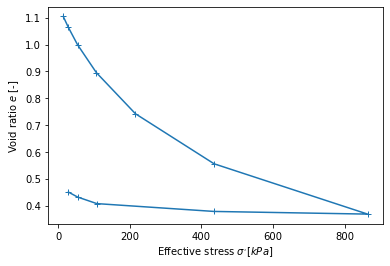

In [9]:
plt.plot(consol_data['sigma'],consol_data['e'] , '-+')

plt.xlabel(r'Effective stress $\sigma^{,} [kPa]$')
plt.ylabel(r'Void ratio $e$ [-]')

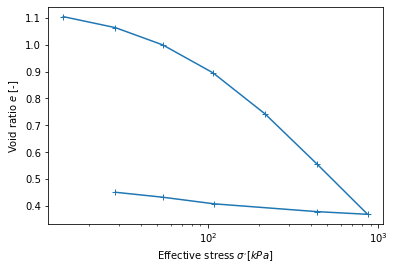

In [10]:
plt.plot(consol_data['sigma'],consol_data['e'] , '-+')

plt.xlabel(r'Effective stress $\sigma^{,} [kPa]$')
plt.ylabel(r'Void ratio $e$ [-]')
plt.xscale('log')

In [12]:
# Using a log cycle

Cc=-(0.3364-0.9311)
print('C_c= %1.3f' % Cc)

C_c= 0.595


In [17]:
# Using the first three data points

model=np.polyfit(np.log10(consol_data['sigma'][4:7]), consol_data['e'][4:7], 1) # linear regression with three data points

Cc=-model[0] #slope
print('C_c= %1.3f' % Cc)



C_c= 0.620


In [18]:
# Using a log cycle

Cr=(0.4086-0.3656)
print('C_r= %1.3f' % Cr)

C_r= 0.043


In [19]:
# using the whole reloading data

model=np.polyfit(np.log10(consol_data['sigma'][6:]), consol_data['e'][6:], 1) 

Cr=-model[0]
print('C_r= %1.3f' % Cr)

C_r= 0.056


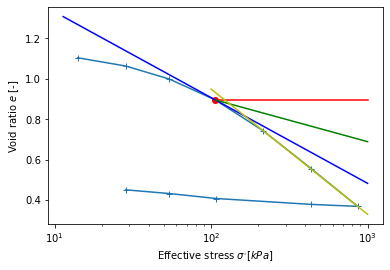

In [25]:
# I will find the point of maximum curvature numerically
consol_data['logsig']=np.log10(consol_data['sigma'])
dydx=np.gradient(consol_data['e'][0:7], consol_data['logsig'][0:7]) # first derivative
d2ydx2=np.gradient(dydx, consol_data['logsig'][0:7]) #second derivative

max_curvature_idx=np.argmax(np.abs(d2ydx2)) # gets the id of point


plt.plot(consol_data['sigma'],consol_data['e'] , '-+')

plt.plot(consol_data['sigma'][max_curvature_idx], consol_data['e'][max_curvature_idx], 'o', color='r')

plt.xlabel(r'Effective stress $\sigma^{,} [kPa]$')
plt.ylabel(r'Void ratio $e$ [-]')
plt.xscale('log')


#draw a horizontal line
x=[consol_data['sigma'][max_curvature_idx], 1000]
y=[consol_data['e'][max_curvature_idx], consol_data['e'][max_curvature_idx]]
plt.plot(x, y, 'r')

#draw a slope that passes trough the point od max curvature

max_sig=1000
x=np.array([consol_data['sigma'][max_curvature_idx]**2/max_sig, max_sig])
y=dydx[max_curvature_idx]*np.log10(x/consol_data['sigma'][max_curvature_idx])+consol_data['e'][max_curvature_idx]

plt.plot(x, y, 'b')

#draw a bisector
x=np.array([consol_data['sigma'][max_curvature_idx], max_sig])
y=0.5*dydx[max_curvature_idx]*np.log10(x/consol_data['sigma'][max_curvature_idx])+consol_data['e'][max_curvature_idx]

plt.plot(x, y, 'g')

#Extend the virgin curve
x=[max_sig/10, max_sig]
y=-Cc*np.log10(x/consol_data['sigma'][6])+consol_data['e'][6]

plt.plot(x, y, 'y')


From the figure $\sigma'_c=110$ kPa

In [28]:
logsig=(consol_data['e'][6]-consol_data['e'][max_curvature_idx]+0.5*dydx[max_curvature_idx]*np.log10(consol_data['sigma'][max_curvature_idx])+Cc*np.log10(consol_data['sigma'][6]))/(0.5*dydx[max_curvature_idx]+Cc)

sigma_c=10**(logsig)
sigma_c

print('sigma_c= %1.2f kPa' % sigma_c)

sigma_c= 131.20 kPa


In [ ]:
# From fig